<div style="font-size: 17px">

# Agent Based Monetary Models

This code implements a couple agent based models based on very simple monetary dynamics.

1. Exchange model: fix lowest wealth=0, at each iteration randomly pick two agents and exchange a fixed sum between them

https://arxiv.org/pdf/0905.1518.pdf

2. Growth model: at each iteration randomly choose an agent based on the probability

$$ \mathbb{p}(\text{agent } i \text{ gains wealth packet } w) = 
\dfrac{w_i^\gamma}{\sum_{j=1}^{N}w_j^\gamma} $$

The growth model can be related to an 'urn' model where we consider an urn of balls of different colours and the number of balls of each colour represents the wealth.



https://www.osti.gov/pages/servlets/purl/1474734

In [1]:
from packages import * #Import packages in packages file
from functions import * #Import functions from functions file
import matplotlib.ticker as mticker
%matplotlib inline 

In [2]:
#Function which calculates empirical cumulative distribution
def ecdf_points(data):
    L=len(data)
    data_array=[]
    for i in range(L):
        data_array.append(data[i])
    np.asarray(data_array,float)
    x=np.sort(data_array)
    y=np.arange(0,1,1/L)
    X=[x[0]]
    Y=[y[0]]
    for i in range(0,L-1):
        if(x[i]!=x[i+1]):
            X.append(x[i+1])
            Y.append(y[i+1])
    X=np.asarray(X,float)
    Y=np.asarray(Y,float)
    return X,Y

#Function finds tail distribution  
def tail(x):
    x_ecdf,y_ecdf=ecdf_points(x)
    Y_ecdf=1-y_ecdf
    return x_ecdf, Y_ecdf  

In [58]:
%%time
#Yakovenko Exchange

N=1000
M=1000
w_exchange=np.ones(N)*M
T=10000000
exchange=50

for t in range(T):
    i=random.randint(0,N-1)
    j=random.randint(0,N-1)
    if(i!=j and w_exchange[j]>exchange):
            w_exchange[i]+=exchange
            w_exchange[j]-=exchange

CPU times: user 30.6 s, sys: 0 ns, total: 30.6 s
Wall time: 30.6 s


In [4]:

%%time

# super reinforcement/non-linear reinforcement

W0=10
W=1
N=500

g=1.3

T=100000

individuals_wealth_sr=np.ones(N)*W0

individuals_sr=[]
for i in range(N):
    for j in range(W0):
        individuals_sr.append(i)


s=[]

for i in range(T):
    r=(i+1)**g-i**g
    r=int(r)
    s.append(r)
    
for t in range(T):
    j=random.choice(individuals_sr)
    j=int(j)
    individuals_wealth_sr[j]+=W
    W_j=int(individuals_wealth_sr[j])
    p_j=s[W_j]
    add_list=np.ones(p_j)*j
    individuals_sr=np.concatenate((individuals_sr,add_list))

#print(s)
print(individuals_sr)

[  0.   0.   0. ... 352. 352. 352.]
CPU times: user 14.3 s, sys: 27.1 s, total: 41.4 s
Wall time: 41.6 s


In [5]:
%%time

#Vallejos growth model

W0=1000
W=100
N=500

individuals_wealth=np.ones(N)*W0

individuals=np.arange(0,N,1)

T=100000
g=1.3


for t in range(T):
    powers=[]

    for i in range(N):
        powers.append(individuals_wealth[i]**g)

    sum_powers=sum(powers)

    probabilities=[]

    for i in range(N):
        probabilities.append(powers[i]/sum_powers)

    j=np.random.choice(individuals, 1, p=probabilities)[0]

    individuals_wealth[j]+=W

CPU times: user 35.8 s, sys: 468 ms, total: 36.3 s
Wall time: 35.1 s


In [59]:
x1,y1=tail(w_exchange)

M=np.mean(w_exchange)

def exp_tail(x,M):
    f=np.exp(-(x/M))
    return f

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

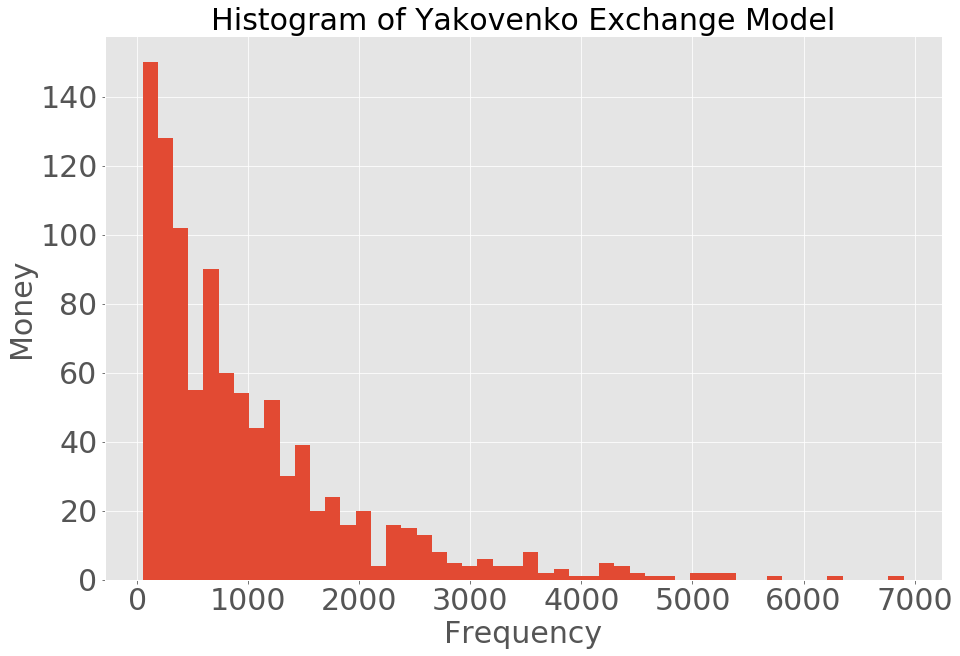

In [63]:
plt.figure(figsize=(15,10))
plt.hist(w_exchange,50)
plt.title('Histogram of Yakovenko Exchange Model',fontsize=30)
plt.xlabel('Frequency',fontsize=30)
plt.ylabel('Money',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

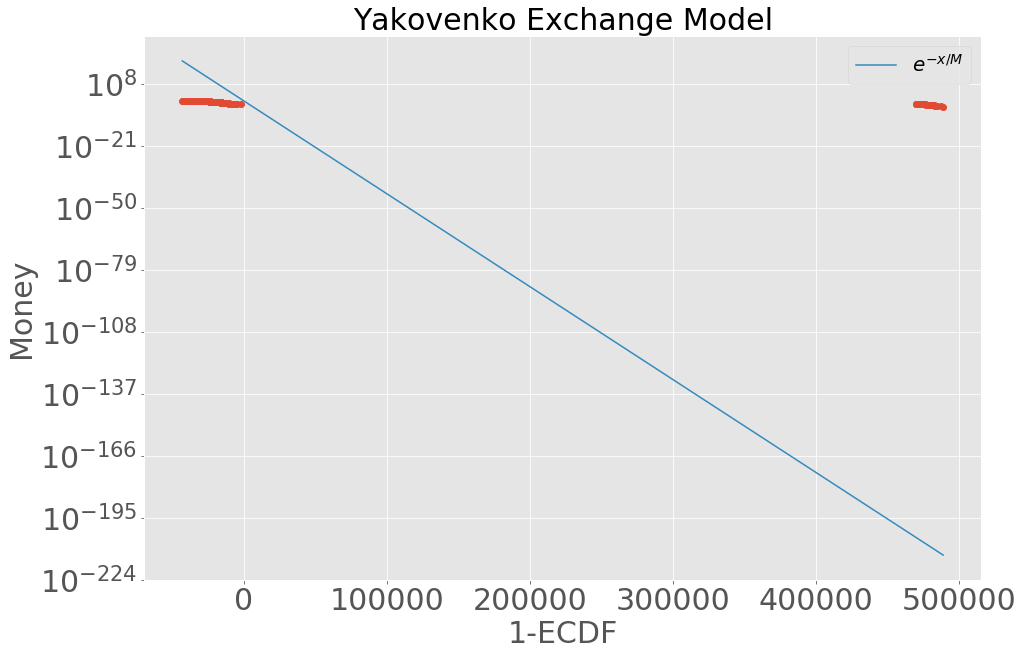

In [57]:
plt.figure(figsize=(15,10))
plt.semilogy(x1,y1,'o')
plt.semilogy(x1,exp_tail(x1,M),label="$e^{-x/M}$")
plt.title('Yakovenko Exchange Model',fontsize=30)
plt.xlabel('1-ECDF',fontsize=30)
plt.ylabel('Money',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(fontsize=20)

In [8]:
x2,y2=tail(individuals_wealth_sr)

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 7 Text yticklabel objects>)

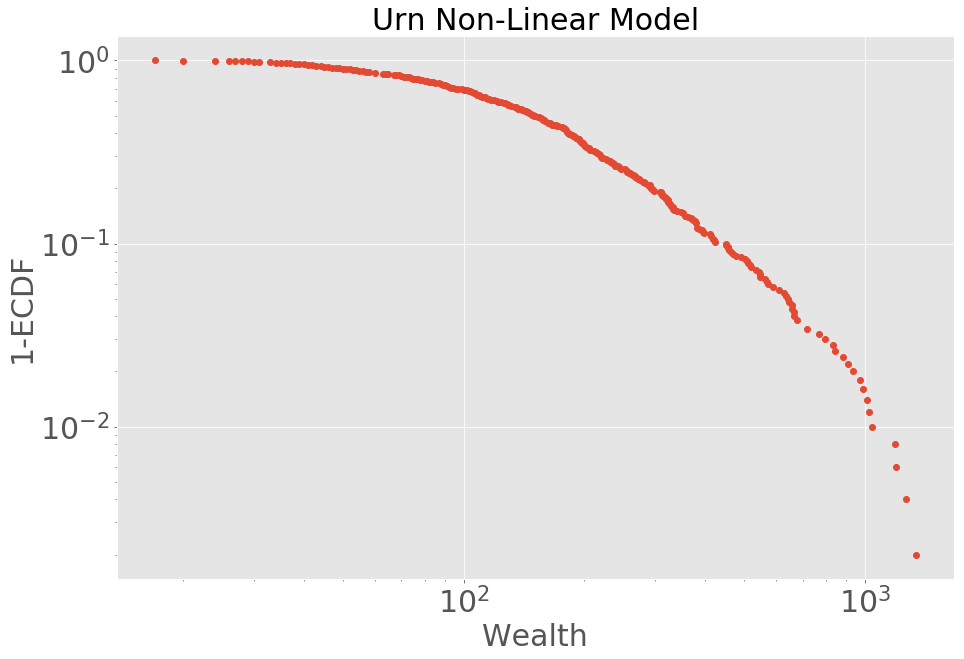

In [9]:
plt.figure(figsize=(15,10))
plt.loglog(x2,y2,'o')

plt.title('Urn Non-Linear Model',fontsize=30)
plt.xlabel('Wealth',fontsize=30)
plt.ylabel('1-ECDF',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [10]:
x3,y3=tail(individuals_wealth)

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 7 Text yticklabel objects>)

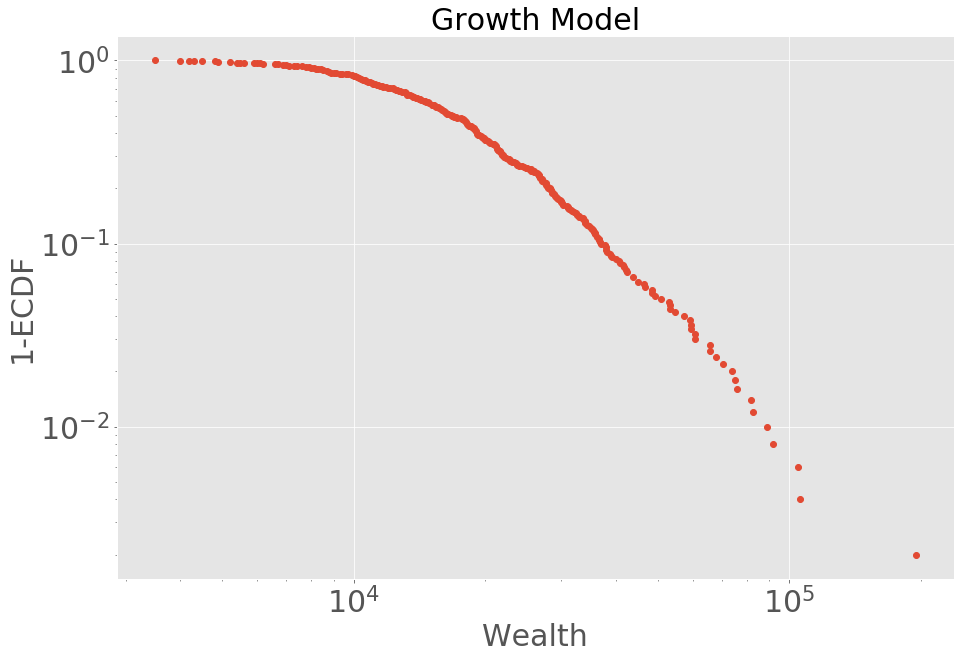

In [11]:
plt.figure(figsize=(15,10))
plt.loglog(x3,y3,'o')

plt.title('Growth Model',fontsize=30)
plt.xlabel('Wealth',fontsize=30)
plt.ylabel('1-ECDF',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)